In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops
#from skimage.measure import shannon_entropy
#from skimage.util import img_as_ubyte
#from scipy import stats
#import pandas as pd
#import seaborn as sns


In [65]:
def otsu_watershed_segmentation(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    blurred = cv2.medianBlur(gray, ksize=21)

    ret, otsu_thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    kernel = np.ones((29, 29), np.uint8)
    opening = cv2.morphologyEx(otsu_thresh, cv2.MORPH_OPEN, kernel, iterations=1)

    kernel = np.ones((21, 21), np.uint8)
    sure_bg = cv2.dilate(opening, kernel, iterations=1)

    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    ret, markers = cv2.connectedComponents(sure_fg)

    markers = markers + 1

    markers[unknown == 255] = 0

    markers = cv2.watershed(image, markers)
    image[markers == -1] = [0, 0, 255]

    kernel_dilate = np.ones((20, 20), np.uint8)
    segmented_image_dilated = cv2.dilate(image, kernel_dilate, iterations=1)

    return otsu_thresh, markers, segmented_image_dilated

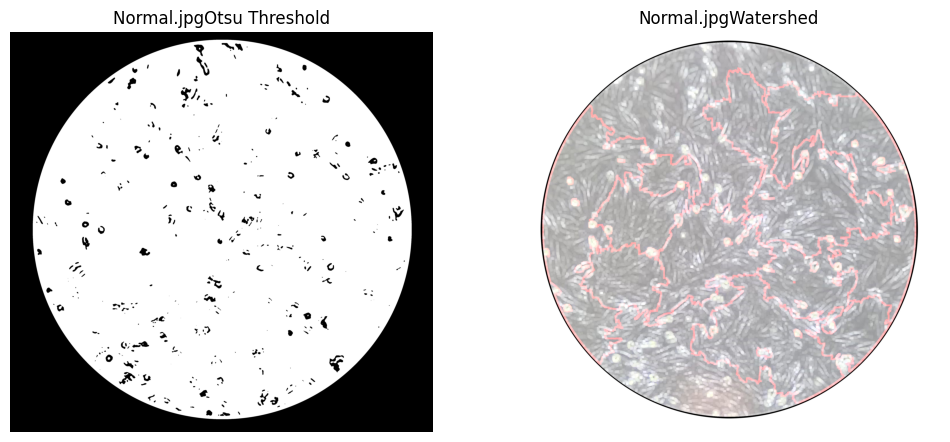

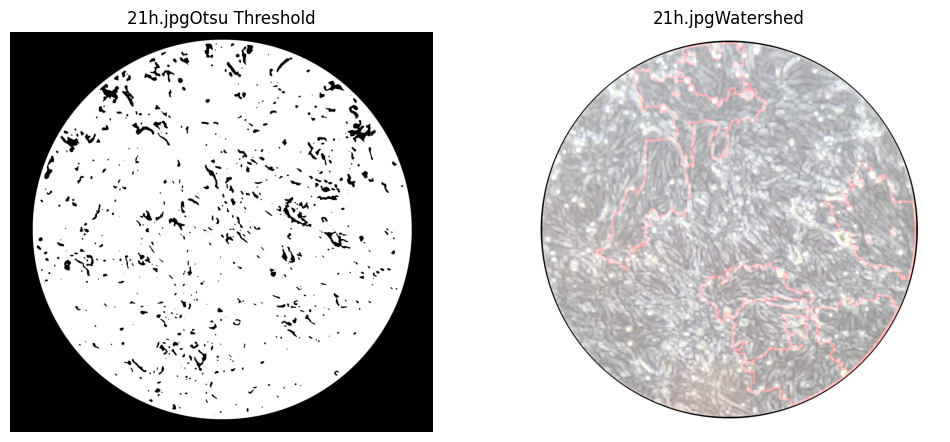

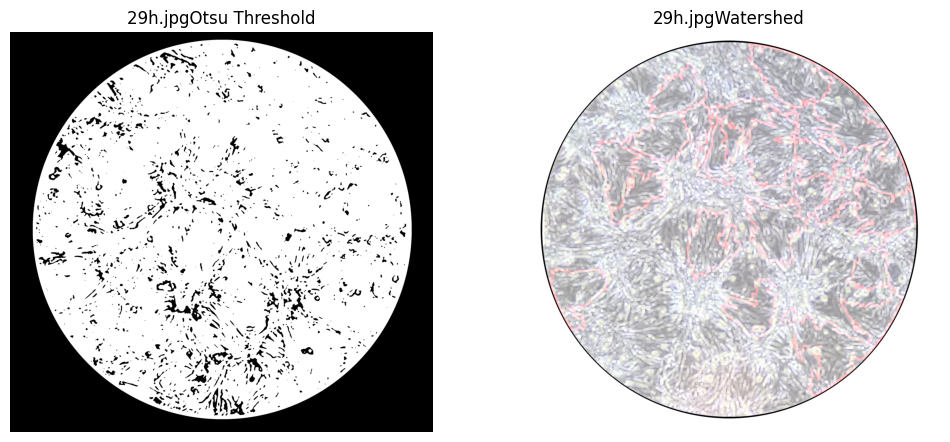

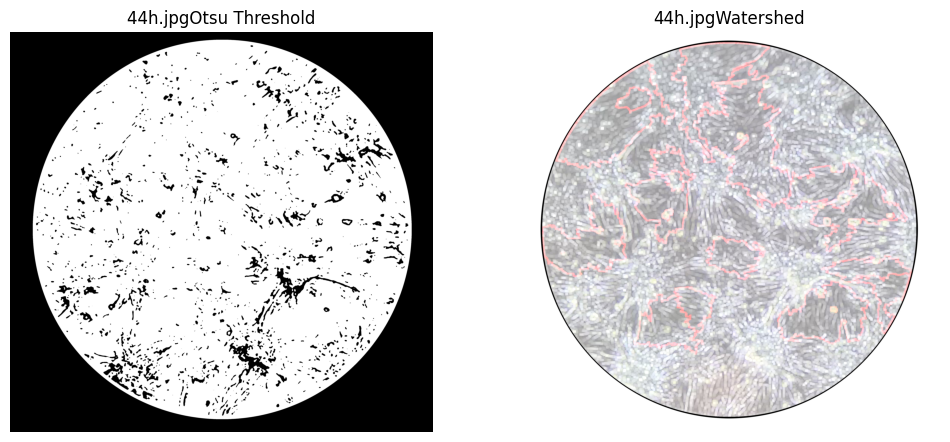

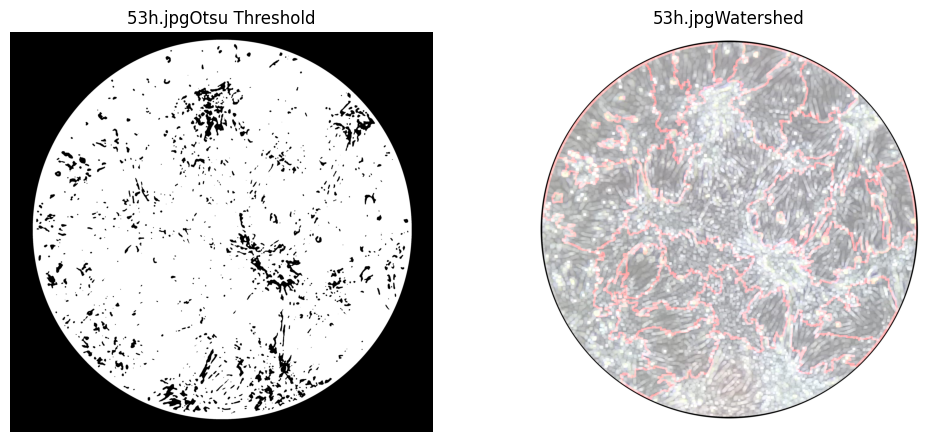

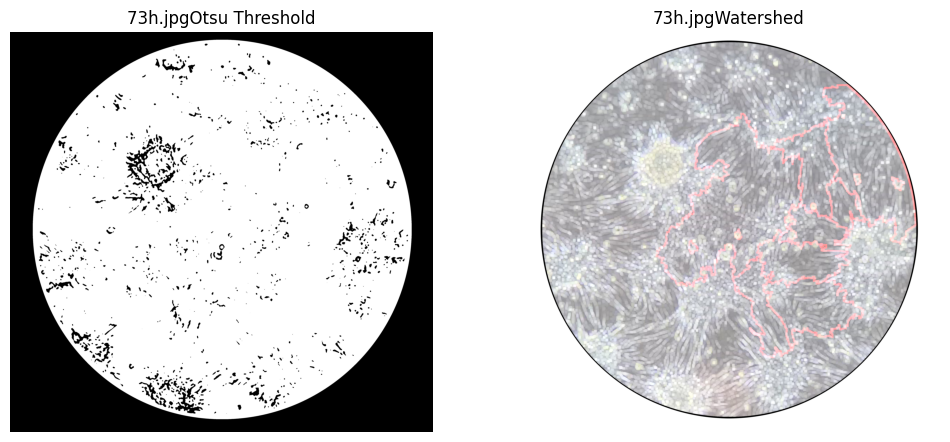

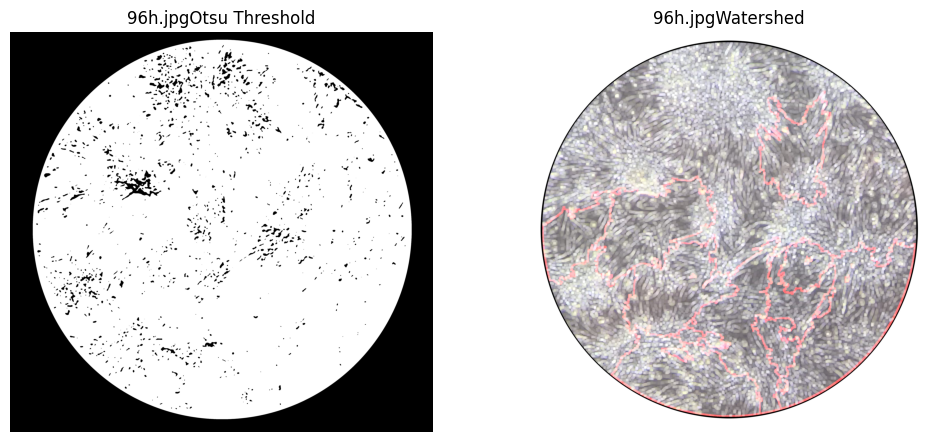

In [82]:
images = ['Normal.jpg', '21h.jpg', '29h.jpg', '44h.jpg', '53h.jpg', '73h.jpg', '96h.jpg']

for image in images:
  otsu_thresh, markers, segmented_image = otsu_watershed_segmentation(image)
  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  plt.imshow(cv2.cvtColor(otsu_thresh, cv2.COLOR_BGR2RGB))
  plt.title(image + 'Otsu Threshold')
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
  plt.title(image + 'Watershed')
  plt.axis('off')

  plt.show()

In [74]:
import numpy as np
from skimage.feature import graycomatrix, graycoprops

def compute_average_cooccurrence_matrix(image, distances, angles):
    matrices = [graycomatrix(image, distances=[d], angles=[a], symmetric=True, normed=True)
                for d in distances for a in angles]
    average_matrix = np.mean(matrices, axis=0)
    return average_matrix

def compute_texture_features(cooccurrence_matrix):
    features = {}
    features['Angular Second Moment'] = graycoprops(cooccurrence_matrix, 'ASM')[0, 0]
    features['Correlation'] = graycoprops(cooccurrence_matrix, 'correlation')[0, 0]
    features['Energy'] = graycoprops(cooccurrence_matrix, 'energy')[0, 0]
    features['Contrast'] = graycoprops(cooccurrence_matrix, 'contrast')[0, 0]
    features['Homogeneity'] = graycoprops(cooccurrence_matrix, 'homogeneity')[0, 0]
    return features

Texture Features:
Angular Second Moment: 0.11233348419201444
Correlation: 0.996788033096691
Energy: 0.3351618775935211
Contrast: 17.017143909126172
Homogeneity: 0.6978037666153081


In [83]:
images = ['Normal.jpg', '21h.jpg', '29h.jpg', '44h.jpg', '53h.jpg', '73h.jpg', '96h.jpg']
distances = [1]
angles = [0, np.pi/2, np.pi, 3*np.pi/2]

for image in images:
  img = cv2.imread(image)
  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  average_cooccurrence_matrix = compute_average_cooccurrence_matrix(gray_img, distances, angles)
  texture_features = compute_texture_features(average_cooccurrence_matrix)
  print(image + " Texture Features: ")
  for feature, value in texture_features.items():
      print(f"{feature}: {value}")

Normal.jpg Texture Features: 
Angular Second Moment: 0.11233348419201444
Correlation: 0.996788033096691
Energy: 0.3351618775935211
Contrast: 17.017143909126172
Homogeneity: 0.6978037666153081
21h.jpg Texture Features: 
Angular Second Moment: 0.11219519031267249
Correlation: 0.9968569571343726
Energy: 0.33495550497442567
Contrast: 15.76971841988707
Homogeneity: 0.7243218000952831
29h.jpg Texture Features: 
Angular Second Moment: 0.11129496876834186
Correlation: 0.9962422614586955
Energy: 0.33360900582619446
Contrast: 21.77810310429008
Homogeneity: 0.5829958018785762
44h.jpg Texture Features: 
Angular Second Moment: 0.11142718619736645
Correlation: 0.996472035286688
Energy: 0.333807109267263
Contrast: 18.919452468745575
Homogeneity: 0.6229791565350459
53h.jpg Texture Features: 
Angular Second Moment: 0.11172051844347426
Correlation: 0.9967921805788096
Energy: 0.33424619435899977
Contrast: 17.18658761710474
Homogeneity: 0.6688338244988055
73h.jpg Texture Features: 
Angular Second Moment: 

In [84]:
images = ['Normal.jpg', '21h.jpg', '29h.jpg', '44h.jpg', '53h.jpg', '73h.jpg', '96h.jpg']
distances = [1]
angles = [0, np.pi/2, np.pi, 3*np.pi/2]

for image in images:
    img = cv2.imread(image)

    # Converter para escala de cinza
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Aplicar filtro da mediana com kernel 21
    gray_img_median = cv2.medianBlur(gray_img, 21)

    # Aplicar segmentação de Otsu
    _, segmented_img = cv2.threshold(gray_img_median, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Aplicar erosão com kernel 29
    kernel_erosion = np.ones((29, 29), np.uint8)
    eroded_img = cv2.erode(segmented_img, kernel_erosion, iterations=1)

    # Aplicar dilatação com kernel 21
    kernel_dilation = np.ones((21, 21), np.uint8)
    dilated_img = cv2.dilate(eroded_img, kernel_dilation, iterations=1)

    # Calcular a matriz de coocorrência média
    average_cooccurrence_matrix = compute_average_cooccurrence_matrix(dilated_img, distances, angles)

    # Calcular descritores de textura
    texture_features = compute_texture_features(average_cooccurrence_matrix)

    print(image + " Texture Features: ")
    for feature, value in texture_features.items():
        print(f"{feature}: {value}")

Normal.jpg Texture Features: 
Angular Second Moment: 0.5551310227013266
Correlation: 0.9988093241066345
Energy: 0.7450711527775898
Contrast: 34.40246171242623
Homogeneity: 0.999470942981078
21h.jpg Texture Features: 
Angular Second Moment: 0.551799534959415
Correlation: 0.9983242253655676
Energy: 0.7428321041523549
Contrast: 48.75752479645981
Homogeneity: 0.9992501841602366
29h.jpg Texture Features: 
Angular Second Moment: 0.5538310964328184
Correlation: 0.9986072103903841
Energy: 0.7441982910708801
Contrast: 40.351630875605025
Homogeneity: 0.999379453897278
44h.jpg Texture Features: 
Angular Second Moment: 0.5527212163662685
Correlation: 0.9984753197055697
Energy: 0.7434522287048903
Contrast: 44.27680151841422
Homogeneity: 0.9993190908018575
53h.jpg Texture Features: 
Angular Second Moment: 0.5514774013018996
Correlation: 0.9982562761391592
Energy: 0.7426152444583262
Contrast: 50.76756821947113
Homogeneity: 0.9992192727798193
73h.jpg Texture Features: 
Angular Second Moment: 0.5555389